In [2]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# the provided library
from hSBM_Topicmodel.sbmtm import sbmtm

# spacy for lemmatization
import spacy
import gensim
from gensim.utils import simple_preprocess

# Plotting tools

import graph_tool.all as gt
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)


/usr/local/Cellar/python/3.7.0/Frameworks/Python.framework/Versions/3.7/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/local/Cellar/python/3.7.0/Frameworks/Python.framework/Versions/3.7/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192, got 176
  return f(*args, **kwds)
/usr/local/Cellar/python/3.7.0/Frameworks/Python.framework/Versions/3.7/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/local/Cellar/python/3.7.0/Frameworks/Python.framework/Versions/3.7/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192, got 176
  return f(*args, **kwds)


In [3]:
df = pd.read_csv('../data/final01.csv')
df = df.dropna()

In [4]:
df['abstract'] = df['abstract'].astype(str)
df['title'] = df['title'].astype(str)

In [5]:
pprint(df.abstract.values[:1])

array(["We present GHUMVEE, a multi-variant execution engine for software intrusion detection. GHUMVEE transparently executes and monitors diversified replicae of processes to thwart attacks relying on a predictable, single data layout. Unlike existing tools, GHUMVEE's interventions in the process' execution are not limited to system call invocations. Because of that design decision, GHUMVEE can handle complex, multi-threaded real-life programs that display non-deterministic behavior as a result of non-deterministic thread scheduling and as a result of pointer-value dependent behavior. This capability is demonstrated on GUI programs from the Gnome and KDE desktop environments. © 2013 Springer-Verlag."],
      dtype=object)


In [6]:
pprint(df.title.values[:1])

array(['GHUMVEE: Efficient, effective, and flexible replication'],
      dtype=object)


In [7]:
data = df.abstract.values.tolist()
data = [re.sub(r'[\xc2\xa9][^\.]*\.', ' ', abstract) for abstract in data]

In [8]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))
data_titles = df.title.tolist()

print(data_words[:1])
print(data_titles[:1])

[['we', 'present', 'ghumvee', 'multi', 'variant', 'execution', 'engine', 'for', 'software', 'intrusion', 'detection', 'ghumvee', 'transparently', 'executes', 'and', 'monitors', 'diversified', 'replicae', 'of', 'processes', 'to', 'thwart', 'attacks', 'relying', 'on', 'predictable', 'single', 'data', 'layout', 'unlike', 'existing', 'tools', 'ghumvee', 'interventions', 'in', 'the', 'process', 'execution', 'are', 'not', 'limited', 'to', 'system', 'call', 'invocations', 'because', 'of', 'that', 'design', 'decision', 'ghumvee', 'can', 'handle', 'complex', 'multi', 'threaded', 'real', 'life', 'programs', 'that', 'display', 'non', 'deterministic', 'behavior', 'as', 'result', 'of', 'non', 'deterministic', 'thread', 'scheduling', 'and', 'as', 'result', 'of', 'pointer', 'value', 'dependent', 'behavior', 'this', 'capability', 'is', 'demonstrated', 'on', 'gui', 'programs', 'from', 'the', 'gnome', 'and', 'kde', 'desktop', 'environments']]
['GHUMVEE: Efficient, effective, and flexible replication']


In [10]:
## we create an instance of the sbmtm-class
model = sbmtm()

## we have to create the word-document network from the corpus
model.make_graph(data_words, documents=data_titles)

## we can also skip the previous step by saving/loading a graph
# model.save_graph(filename = 'graph.xml.gz')
# model.load_graph(filename = 'graph.xml.gz')

## fit the model
gt.seed_rng(32) ## seed for graph-tool's random number generator --> same results
model.fit()

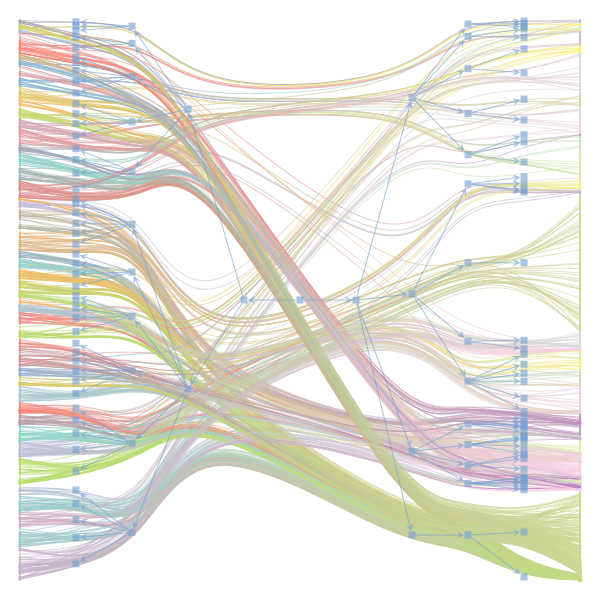

In [11]:
## Basic plot, left is documents and right is words
model.plot()

In [12]:
# we can see the keywords generated here
model.topics(l=1, n=20)

{0: [('the', 0.019118100524205983),
  ('and', 0.019118100524205983),
  ('of', 0.01893308664816528),
  ('to', 0.018563058896083874),
  ('in', 0.018316373728029602),
  ('is', 0.016836262719703978),
  ('this', 0.016342892383595438),
  ('that', 0.015109466543324082),
  ('we', 0.014677767499229109),
  ('for', 0.014431082331174839),
  ('on', 0.013629355534998458),
  ('paper', 0.012642614862781376),
  ('are', 0.012580943570767807),
  ('by', 0.012025901942645698),
  ('an', 0.01171754548257786),
  ('as', 0.011162503854455752),
  ('with', 0.010792476102374344),
  ('can', 0.010730804810360777),
  ('based', 0.01060746222633364),
  ('which', 0.00931236509404872)],
 1: [('point', 0.011132940406024885),
  ('mac', 0.006548788474132285),
  ('privacy', 0.0045841519318926),
  ('record', 0.003929273084479371),
  ('part', 0.0032743942370661427),
  ('transparently', 0.0026195153896529143),
  ('additionally', 0.0026195153896529143),
  ('approximately', 0.0019646365422396855),
  ('library', 0.0019646365422396

In [21]:
# We also get free clustering of documents! We can do more with this, such as looking up similar documents
# given a document name.
import pandas as pd
# get clusters generated by model
clusters = model.clusters(l=1,n=5)
# remove tuples second elements (useless number)
for k in clusters:
    clusters[k] = [p[0] for p in clusters[k]]
# convert to dataframe
df = pd.DataFrame.from_dict(clusters, orient='index')
df.tail()

0  \
6   Logical wormhole prevention in optimized link ...   
7   Secure time synchronization protocols for wire...   
8   Primary user emulation attack in dynamic spect...   
9   Joint middlebox selection and routing for soft...   
10  Replay protection at the link layer security i...   

                                                    1  \
6   Effective and robust detection of jamming attacks   
7   Delay attack-resilient clock synchronization f...   
8   Securing wireless transmission against reactiv...   
9   Short paper: Jamming-resistant multi-path rout...   
10  Countering DoS attacks with stateless multipat...   

                                                    2  \
6   Detecting and avoiding wormhole attacks in opt...   
7   Fractional order Liu-system synchronization an...   
8   Detection of primary user emulation attacks in...   
9   Protection of long-reach PON traffic through r...   
10  Replayer: Automatic protocol replay by binary ...   

                                                    3  \
6   Detecting DoS and DDoS attacks by using an int...   
7   Global chaos synchronization of three coupled ...   
8   Defense against primary user emulation attacks...   
9   CPS: Driving cyber-physical systems to unsafe ...   
10  Multi-image encryption based on synchronizatio...   

                                                    4  
6   Improving intrusion detection system based on ...  
7   High precision time synchronization scheme for...  
8   A common lexicon and design issues surrounding...  
9   Applying formal modelling to detect DoS attack...  
10  Design guidelines for security protocols to pr...